# Exploratory Data Analysis (EDA) and Data Cleaning

This notebook focuses on exploring and cleaning our dataset that contains user reviews. The goal is to prepare the data for further analysis and modeling.

## 1. Import Required Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 2. Load Dataset

In [173]:
# Load the raw data
df = pd.read_csv('../Raw_Data/raw_data.csv')

# Display the first few rows
display(df.head())

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

,title,content,type
0,Cực kì hài lòng,"Sách rất hay. Dựa trên nghiên cứu, và có hướng...",0
1,Cực kì hài lòng,Nội dung sách quá hay\r\nRất đơn giản và dễ áp...,0
2,Cực kì hài lòng,Quyển này hay mà tác giả viết rất dễ đọc nha n...,0
3,Cực kì hài lòng,Dạo này thói quen xấu lại bủa vây nên tôi quyế...,0
4,Cực kì hài lòng,"Tiki giao thần tốc, mình đặt 1h sáng giao chiề...",0


Dataset shape: (18609, 3)
Number of rows: 18609
Number of columns: 3


## 3. Initial Data Inspection

In [174]:
# Check the data types of the columns
print("Data types:")
print(df.dtypes)

# Display summary statistics for the dataset
print("\nSummary statistics:")
print(df.describe(include='all'))

Data types:
title      object
content    object
type       object
dtype: object

Summary statistics:
                  title content   type
count             18176   11084  18609
unique              299    8607     27
top     Cực kì hài lòng      Ok      0
freq              14664      72  15559


## 4. Handling Missing Values

In [198]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values in each column:")
print(missing)



Missing values in each column:
title      0
content    0
type       0
dtype: int64


In [176]:
# Drop rows with missing values
rows_before = df.shape[0]
df.dropna(inplace=True)
rows_after = df.shape[0]
print(f"Removed {rows_before - rows_after} rows with missing values")

Removed 7526 rows with missing values


## 5. Handling Duplicate Values

In [177]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates
rows_before = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]
print(f"Removed {rows_before - rows_after} duplicate rows")

# Verify no duplicates remain
print(f"Duplicates after removal: {df.duplicated().sum()}")

Number of duplicate rows: 2087
Removed 2087 duplicate rows
Duplicates after removal: 0


## 6. Analyzing and Processing the 'title' Column

Number of unique values in 'title' column: 299

Unique values in 'title' column:
['Cực kì hài lòng' 'Không hài lòng' 'Rất không hài lòng' 'Bình thường'
 'Hài lòng' 'NHẤT ĐỊNH PHẢI MUA ĐỌC MỘT LẦN TRONG ĐỜI CÁC BÁC Ạ'
 'Nhẹ nhàng nhưng đầy cảm xúc' 'Bung keo' 'gudd!!!' 'Sách hay' 'Xuất sắc'
 'Sách hay và chặt chẽ ??' 'Rất hay!' 'Quá hay!!!'
 '1 trong những tác phẩm nên mua Vscuốn Nghi can X' 'Sách hay và xúc động'
 'Siêu phẩm' 'Hay và cuốn hút' 'Siêu hài lòng' 'Trải nghiệm tuyệt vời'
 'Không chỉ là một câu chuyện trinh thám' 'Lôi cuốn đến khó cưỡng.'
 'Hãy đọc!' '1 quyển sách tuyệt vời' 'nên đọc' 'Rất hay!!!'
 'Sách cực kì hay' 'Highly recommend' 'Vô cùng hài lòng' 'Quá tuyệt vời'
 'Diệu kỳ' 'Rất mong chờ.' 'Rất đáng đọc' 'Hay' 'Hay cực kì!!!!!!!!!!!!!'
 'Quá hay, mình đọc không ngừng trong 4 tiếng' 'Đọc để yêu đời hơn!'
 'Rất thú vị ?' 'Tuyệt... 5 sao' 'Đúng là điều kỳ diệu!!' 'Tuyệt vời'
 'Đây là lần đầu tiên mình viết nhận xét về một cuốn sách mình thích.'
 'Rất hay, rất nên mua' 'Ha

C:\Users\phamd\AppData\Local\Temp\ipykernel_18212\3251925303.py:14: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\phamd\AppData\Local\Temp\ipykernel_18212\3251925303.py:14: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\phamd\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\phamd\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\phamd\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\phamd\AppDat

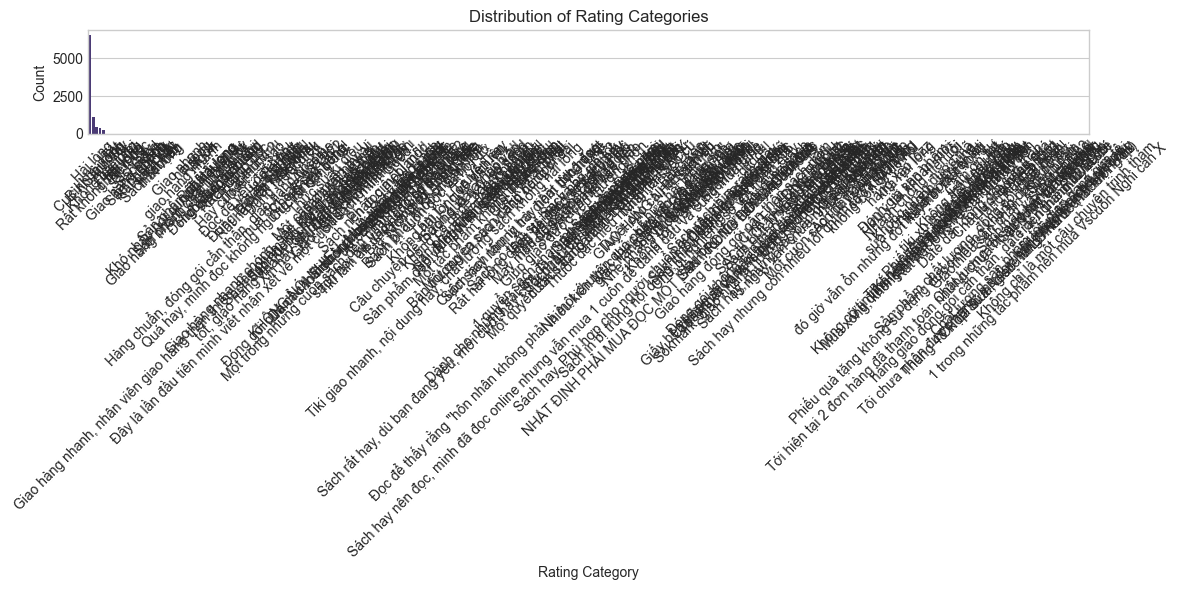

In [178]:
# Check unique values in the 'title' column
unique_titles = df['title'].unique()
print(f"Number of unique values in 'title' column: {df['title'].nunique()}")
print("\nUnique values in 'title' column:")
print(unique_titles)

# Visualize distribution of title values
plt.figure(figsize=(12, 6))
sns.countplot(x='title', data=df, order=df['title'].value_counts().index)
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [179]:
# Keep only valid rating categories in the 'title' column
valid_ratings = ['Cực kì hài lòng', 'Hài lòng', 'Không hài lòng', 'Rất không hài lòng', 'Bình thường']
rows_before = df.shape[0]
df = df[df['title'].isin(valid_ratings)]
rows_after = df.shape[0]
print(f"Removed {rows_before - rows_after} rows with invalid rating categories")

Removed 338 rows with invalid rating categories


Number of unique values in 'title' column after filtering: 5


,title,content,type
0,Cực kì hài lòng,"Sách rất hay. Dựa trên nghiên cứu, và có hướng...",0
1,Cực kì hài lòng,Nội dung sách quá hay\r\nRất đơn giản và dễ áp...,0
2,Cực kì hài lòng,Quyển này hay mà tác giả viết rất dễ đọc nha n...,0
3,Cực kì hài lòng,Dạo này thói quen xấu lại bủa vây nên tôi quyế...,0
4,Cực kì hài lòng,"Tiki giao thần tốc, mình đặt 1h sáng giao chiề...",0


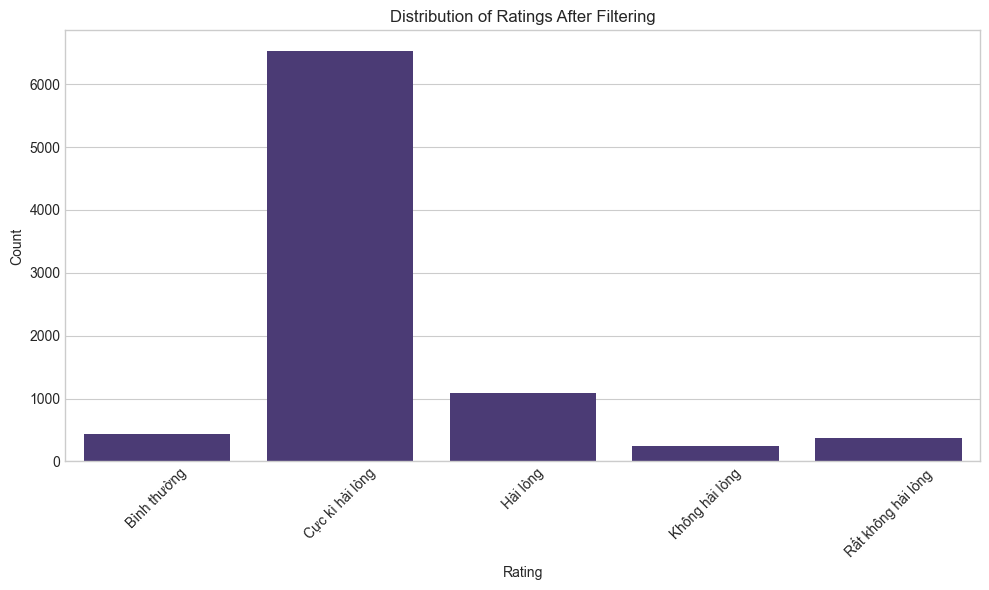

In [180]:
# Verify results
print(f"Number of unique values in 'title' column after filtering: {df['title'].nunique()}")
display(df.head())

# Display the distribution of ratings after filtering
plt.figure(figsize=(10, 6))
rating_counts = df['title'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings After Filtering')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Data Validation and Quality Check

In [181]:
# Check if all rows have values for all 3 columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check if any row has missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(f"\nNumber of rows with missing values: {len(rows_with_missing)}")

# Confirm all rows have complete data
print(f"\nAll rows have complete data: {df.notna().all().all()}")

# Check for empty strings in any column
empty_strings = (df == '').sum()
print("\nEmpty strings in each column:")
print(empty_strings)

# Check for rows with empty content
rows_with_empty_strings = df[df == '']
print(f"\nNumber of rows with empty strings: {len(rows_with_empty_strings)}")

Missing values in each column:
title      0
content    0
type       0
dtype: int64

Number of rows with missing values: 0

All rows have complete data: True

Empty strings in each column:
title      0
content    0
type       0
dtype: int64

Number of rows with empty strings: 8658


## 8. Convert Ratings to Numerical Values

,title,content,type
0,5,"Sách rất hay. Dựa trên nghiên cứu, và có hướng...",0
1,5,Nội dung sách quá hay\r\nRất đơn giản và dễ áp...,0
2,5,Quyển này hay mà tác giả viết rất dễ đọc nha n...,0
3,5,Dạo này thói quen xấu lại bủa vây nên tôi quyế...,0
4,5,"Tiki giao thần tốc, mình đặt 1h sáng giao chiề...",0


C:\Users\phamd\AppData\Local\Temp\ipykernel_18212\3985188576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='title', data=df, palette='viridis', order=sorted(df['title'].unique()))


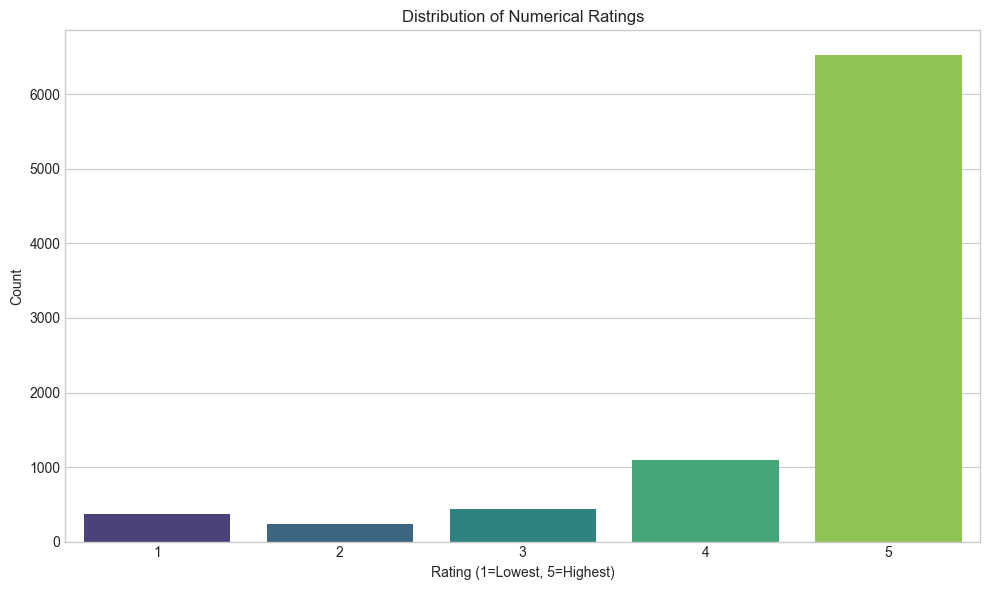

In [182]:
# Define rating conversion dictionary
rating_mapping = {
    'Rất không hài lòng': 1, 
    'Không hài lòng': 2, 
    'Bình thường': 3, 
    'Hài lòng': 4, 
    'Cực kì hài lòng': 5
}

# Convert the 'title' column to numerical ratings
df['title'] = df['title'].map(rating_mapping)
display(df.head())

# Visualize distribution of numerical ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='title', data=df, palette='viridis', order=sorted(df['title'].unique()))
plt.title('Distribution of Numerical Ratings')
plt.xlabel('Rating (1=Lowest, 5=Highest)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [183]:
# Convert columns to appropriate data types
df['title'] = df['title'].astype('category')
df['type'] = df['type'].astype('category')

# Display updated info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 0 to 18608
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   title    8658 non-null   category
 1   content  8658 non-null   object  
 2   type     8658 non-null   category
dtypes: category(2), object(1)
memory usage: 153.6+ KB


## 9. Content Analysis and Text Processing

Statistics for 'content' column:
count     8658
unique    8269
top         Ok
freq        29
Name: content, dtype: object


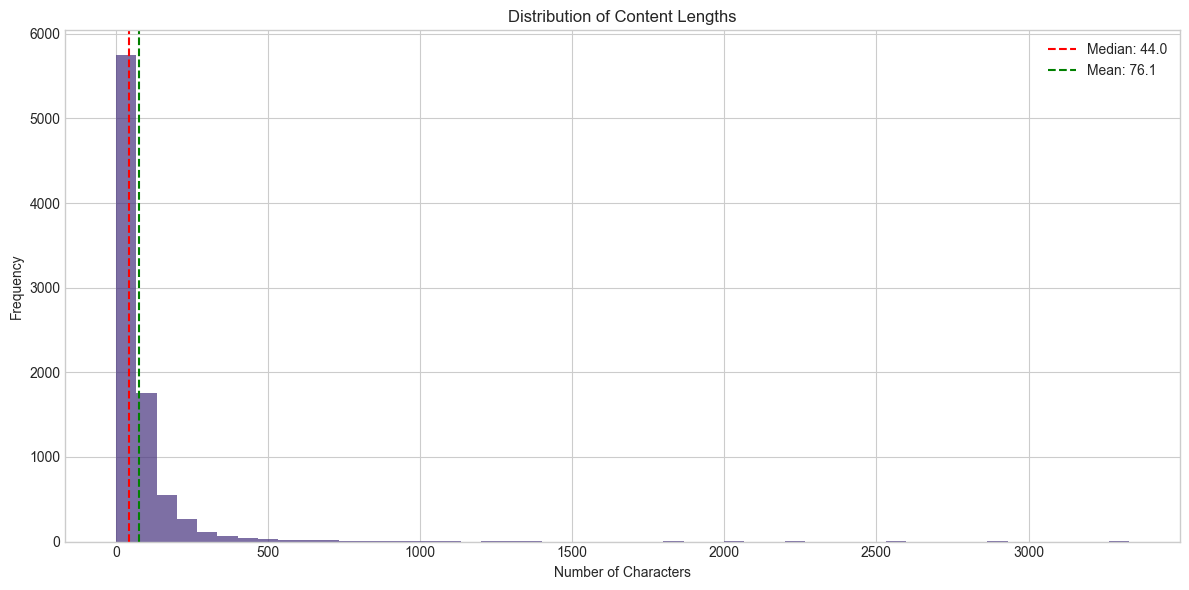

In [184]:
# Check statistics for 'content' column
content_stats = df['content'].describe()
print("Statistics for 'content' column:")
print(content_stats)

# Check content length distribution
content_lengths = df['content'].str.len()
plt.figure(figsize=(12, 6))
plt.hist(content_lengths, bins=50, alpha=0.7)
plt.axvline(content_lengths.median(), color='red', linestyle='--', label=f'Median: {content_lengths.median()}')
plt.axvline(content_lengths.mean(), color='green', linestyle='--', label=f'Mean: {content_lengths.mean():.1f}')
plt.title('Distribution of Content Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [185]:
# Check duplicates in 'content' column
content_duplicates = df['content'].duplicated().sum()
print(f"Number of duplicate contents: {content_duplicates}")

# Drop duplicates in 'content' column
rows_before = df.shape[0]
df.drop_duplicates(subset=['content'], inplace=True)
rows_after = df.shape[0]
print(f"Removed {rows_before - rows_after} rows with duplicate content")

# Check duplicates in 'content' column again
print(f"Content duplicates after removal: {df['content'].duplicated().sum()}")

Number of duplicate contents: 389
Removed 389 rows with duplicate content
Content duplicates after removal: 0


## 10. Text Cleaning and Normalization

Remove excessive whitespace, newlines, and other formatting issues from the 'content' column

In [187]:
# Save some sample texts for comparison after cleaning
sample_indices = np.random.choice(df.index, 5, replace=False)
sample_texts = df.loc[sample_indices, 'content'].tolist()
print("Original sample texts:")
for i, text in enumerate(sample_texts):
    print(f"Sample {i+1}: {text[:100]}{'...' if len(text) > 100 else ''}")

# Remove whitespace, newlines, and carriage returns
df['content'] = df['content'].str.replace('\n', ' ', regex=True) \
                             .str.replace('\r', ' ', regex=True) \
                             .str.replace(' +', ' ', regex=True) \
                             .str.strip()

Original sample texts:
Sample 1: Sách đẹp chất
Sample 2: Truyện đến tay mình thì có vẻ hơi bị trầy ;-;
Sample 3: Chả có gì hay. Tư duy khá chán
Sample 4: giao sớm
Sample 5: Sách hơi trầy. Giao hàng nhanh


## 11. Emoji and Special Character Processing

In [188]:
# Function to normalize repeating characters
def normalize_repeating_chars(text):
    if not isinstance(text, str):
        return text
    # Replace characters that repeat more than twice with a single occurrence
    return re.sub(r'(.)\1{2,}', r'\1', text)

# Function to remove emojis
def remove_emojis(text):
    if not isinstance(text, str):
        return text
    return emoji.replace_emoji(text, '')

In [189]:
# Apply both processing functions to the content column
df['content'] = df['content'].apply(remove_emojis).apply(normalize_repeating_chars)

# Remove excess whitespace after processing
df['content'] = df['content'].str.replace(' +', ' ', regex=True).str.strip()

# Show samples after cleaning
print("Cleaned sample texts:")
for i, old_text in enumerate(sample_texts):
    # Find the corresponding cleaned text by matching the beginning
    idx = df[df['content'].str.contains(old_text[:min(30, len(old_text))], regex=False)].index
    if len(idx) > 0:
        new_text = df.loc[idx[0], 'content']
        print(f"Sample {i+1}: {new_text[:100]}{'...' if len(new_text) > 100 else ''}")
    else:
        print(f"Sample {i+1}: (Text not found after cleaning)")

Cleaned sample texts:
Sample 1: Sách đẹp chất lượng Nội dung rất cuốn
Sample 2: Truyện đến tay mình thì có vẻ hơi bị trầy ;-;
Sample 3: Chả có gì hay. Tư duy khá chán
Sample 4: giao sớm hơn dự kiến 3 ngày, sách được bọc cẩn thận không bị móp méo gì hết
Sample 5: Sách hơi trầy. Giao hàng nhanh


In [190]:
# Verify data quality after cleaning
print("Missing values after cleaning:")
print(df.isnull().sum())

print('\nDuplicate values after emoji removal:', df.duplicated().sum())

Missing values after cleaning:
title      0
content    0
type       0
dtype: int64

Duplicate values after emoji removal: 44


In [191]:
# Remove any duplicates that may have emerged after text cleaning
rows_before = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after = df.shape[0]
print(f"Removed {rows_before - rows_after} duplicate rows after text cleaning")
print(f"Final duplicate count: {df.duplicated().sum()}")

Removed 44 duplicate rows after text cleaning
Final duplicate count: 0


## 12. Content Length Analysis


Content length statistics:
Shortest content: 0 characters
Average content length: 79.02 characters
Median content length: 47.0 characters
Longest content: 3327 characters


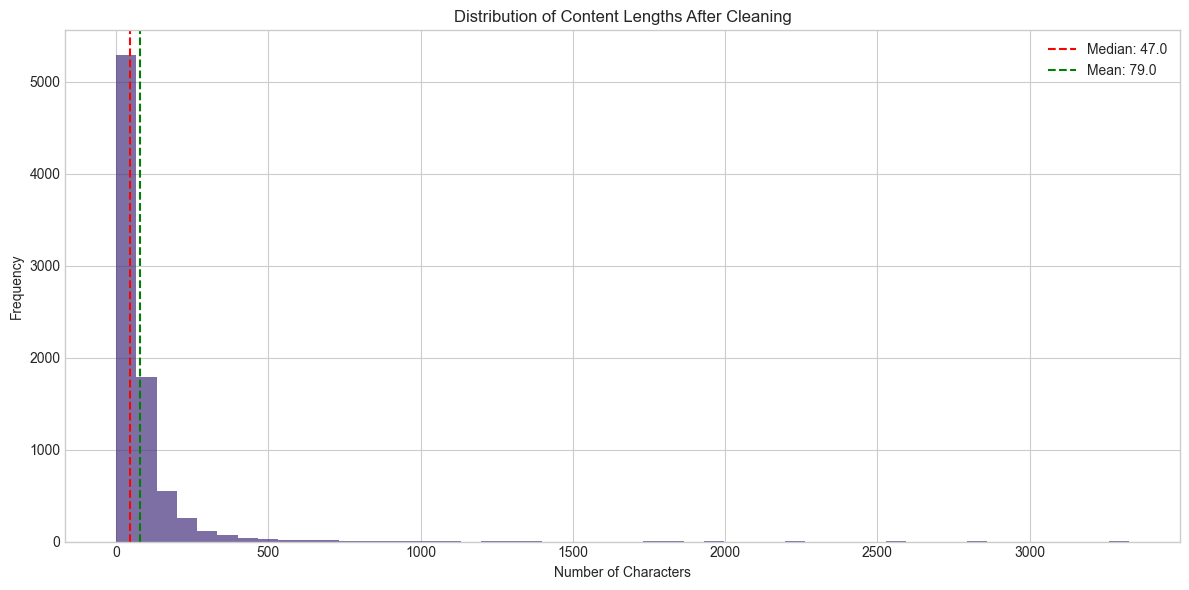


Number of very short contents (≤ 5 characters): 241

Samples of very short contents:
Row 83: 'ok' (Rating: 5) - Length: 2
Row 100: 'good' (Rating: 5) - Length: 4
Row 260: 'Hay' (Rating: 5) - Length: 3
Row 314: 'Ok' (Rating: 5) - Length: 2
Row 364: 'có bk' (Rating: 5) - Length: 5
Row 525: 'Tốt' (Rating: 5) - Length: 3
Row 542: 'Hay á' (Rating: 5) - Length: 5
Row 641: 'hay' (Rating: 5) - Length: 3
Row 650: 'Toots' (Rating: 5) - Length: 5
Row 662: 'hay ạ' (Rating: 5) - Length: 5


In [192]:
# Analyze content length distribution
char_counts = df['content'].str.len()
print("\nContent length statistics:")
print(f"Shortest content: {char_counts.min()} characters")
print(f"Average content length: {char_counts.mean():.2f} characters")
print(f"Median content length: {char_counts.median()} characters")
print(f"Longest content: {char_counts.max()} characters")

# Visualize content length distribution
plt.figure(figsize=(12, 6))
plt.hist(char_counts, bins=50, alpha=0.7)
plt.axvline(char_counts.median(), color='red', linestyle='--', label=f'Median: {char_counts.median()}')
plt.axvline(char_counts.mean(), color='green', linestyle='--', label=f'Mean: {char_counts.mean():.1f}')
plt.title('Distribution of Content Lengths After Cleaning')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Check for very short content (5 characters or fewer)
very_short_contents = df[char_counts <= 5]
print(f"\nNumber of very short contents (≤ 5 characters): {len(very_short_contents)}")

if len(very_short_contents) > 0:
    print("\nSamples of very short contents:")
    for idx, row in very_short_contents.head(10).iterrows():
        print(f"Row {idx}: '{row['content']}' (Rating: {row['title']}) - Length: {len(row['content'])}")

## 13. Remove Spam and Very Short Content

<ul>Very short text inputs like "ok" or the Vietnamese word "hay" (which often means "good" or "interesting") can and often do negatively impact the performance of a sentiment analysis model. because:<br><li> Lack of Context. <li> Ambiguity <li> Few Features

In [193]:
# Count rows before filtering
print(f"Number of rows before filtering: {len(df)}")

# Find rows with extremely short content (single word)
short_contents = df[df['content'].str.match(r'^\s*\S+\s*$')]
print(f"Number of rows with single-word content: {len(short_contents)}")

if len(short_contents) > 0:
    # Show examples of short content
    print("\nExamples of single-word content:")
    for idx, row in short_contents.head(10).iterrows():
        print(f"Row {idx}: '{row['content']}' (Rating: {row['title']})")
    
    # Distribution of ratings for short content
    rating_counts = short_contents['title'].value_counts().sort_index()
    print("\nDistribution of ratings for single-word content:")
    for rating in sorted(rating_counts.index):
        print(f"Rating {rating}: {rating_counts[rating]} rows")
    
    # Remove rows with single-word content
    df = df[~df['content'].str.match(r'^\s*\S+\s*$')]
    print(f"\nRemoved {len(short_contents)} rows with single-word content")
    print(f"Rows remaining: {len(df)}")

Number of rows before filtering: 8225
Number of rows with single-word content: 247

Examples of single-word content:
Row 83: 'ok' (Rating: 5)
Row 100: 'good' (Rating: 5)
Row 260: 'Hay' (Rating: 5)
Row 314: 'Ok' (Rating: 5)
Row 525: 'Tốt' (Rating: 5)
Row 641: 'hay' (Rating: 5)
Row 650: 'Toots' (Rating: 5)
Row 700: '2' (Rating: 5)
Row 997: 'Oki' (Rating: 5)
Row 1047: 'Tuyệt' (Rating: 5)

Distribution of ratings for single-word content:
Rating 1: 0 rows
Rating 2: 0 rows
Rating 3: 1 rows
Rating 4: 25 rows
Rating 5: 221 rows

Removed 247 rows with single-word content
Rows remaining: 7978


In [194]:
# Check for empty content
empty_contents = df[df['content'] == '']
print(f"Number of rows with empty content: {len(empty_contents)}")

if len(empty_contents) > 0:
    # Show examples of empty content rows
    print("\nExamples of rows with empty content:")
    for idx, row in empty_contents.head(5).iterrows():
        print(f"Row {idx}: Rating: {row['title']}")
    
    # Distribution of ratings for empty content
    rating_counts = empty_contents['title'].value_counts().sort_index()
    total_by_rating = df['title'].value_counts().sort_index()
    
    print("\nDistribution of empty content by rating:")
    for rating in sorted(rating_counts.index):
        if rating in total_by_rating.index:
            pct = (rating_counts[rating] / total_by_rating[rating]) * 100
            print(f"Rating {rating}: {rating_counts[rating]} rows ({pct:.2f}% of this rating group)")
    
    # Remove rows with empty content
    df = df[df['content'] != '']
    print(f"\nRemoved {len(empty_contents)} rows with empty content. Dataset now has {len(df)} rows.")

# Final content length statistics
char_counts = df['content'].str.len()
print("\nFinal content length statistics:")
print(f"Shortest content: {char_counts.min()} characters")
print(f"Average content length: {char_counts.mean():.2f} characters")
print(f"Longest content: {char_counts.max()} characters")

Number of rows with empty content: 5

Examples of rows with empty content:
Row 2915: Rating: 5
Row 16061: Rating: 5
Row 16411: Rating: 5
Row 16973: Rating: 5
Row 17814: Rating: 5

Distribution of empty content by rating:
Rating 1: 0 rows (0.00% of this rating group)
Rating 2: 0 rows (0.00% of this rating group)
Rating 3: 0 rows (0.00% of this rating group)
Rating 4: 0 rows (0.00% of this rating group)
Rating 5: 5 rows (0.08% of this rating group)

Removed 5 rows with empty content. Dataset now has 7973 rows.

Final content length statistics:
Shortest content: 4 characters
Average content length: 81.39 characters
Longest content: 3327 characters


## 14. Content-Rating Relationship Analysis

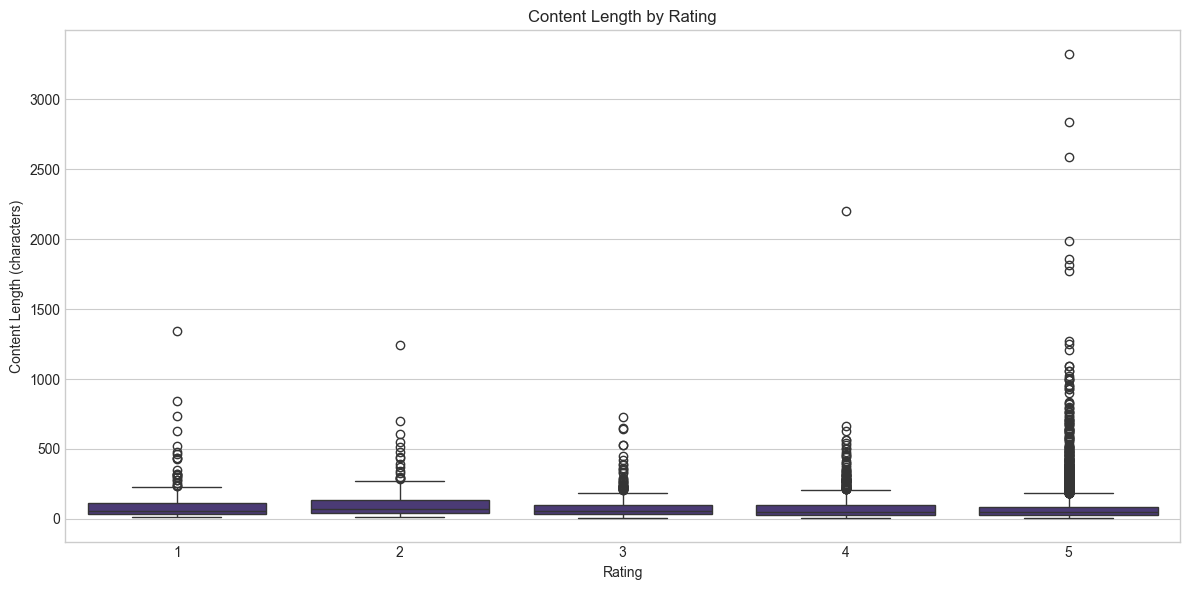

Average content length by rating:
  Rating  Average Content Length
0      1               94.423497
1      2              112.600840
2      3               87.757506
3      4               83.265285
4      5               78.580975


C:\Users\phamd\AppData\Local\Temp\ipykernel_18212\2617974657.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_length_by_rating = df.groupby('title')['content'].apply(lambda x: x.str.len().mean()).reset_index()


In [195]:
# Analyze content length by rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='title', y=df['content'].str.len(), data=df)
plt.title('Content Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Content Length (characters)')
plt.tight_layout()
plt.show()

# Calculate average content length by rating
avg_length_by_rating = df.groupby('title')['content'].apply(lambda x: x.str.len().mean()).reset_index()
avg_length_by_rating.columns = ['Rating', 'Average Content Length']
print("Average content length by rating:")
print(avg_length_by_rating.sort_values('Rating'))

## 15. Type Analysis

Distribution of types:
type
0     5524
4      623
9      440
18     216
11     168
3      162
2      108
5      103
14      86
25      86
Name: count, dtype: int64


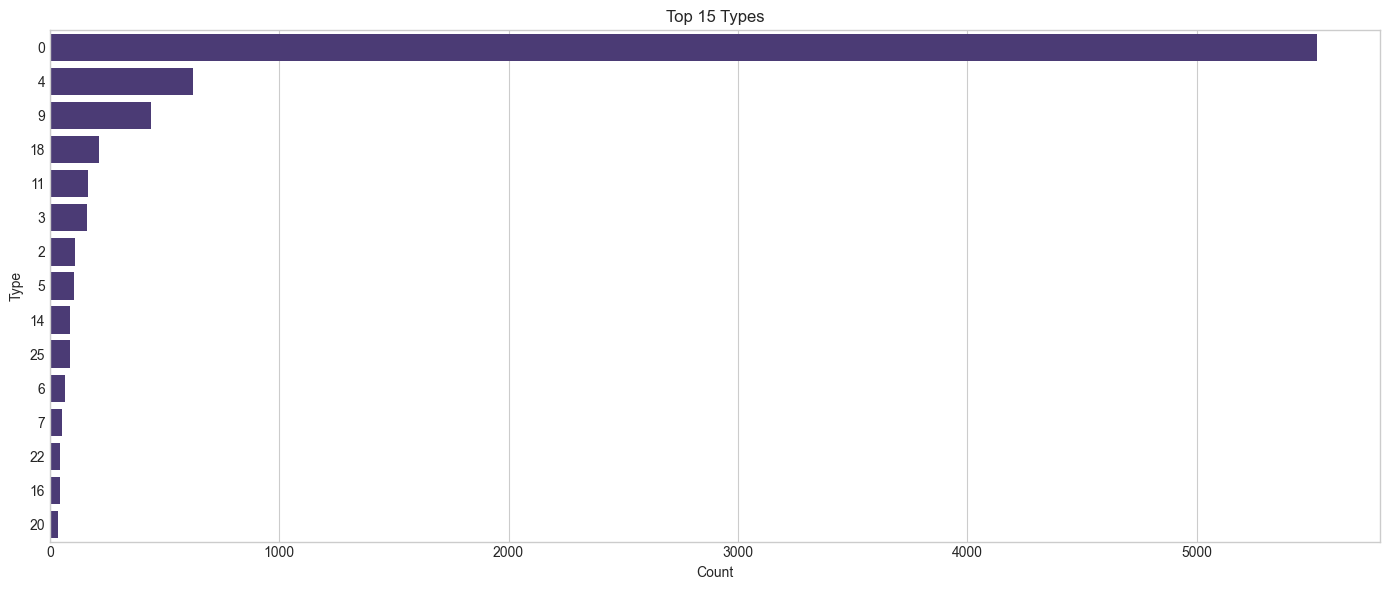

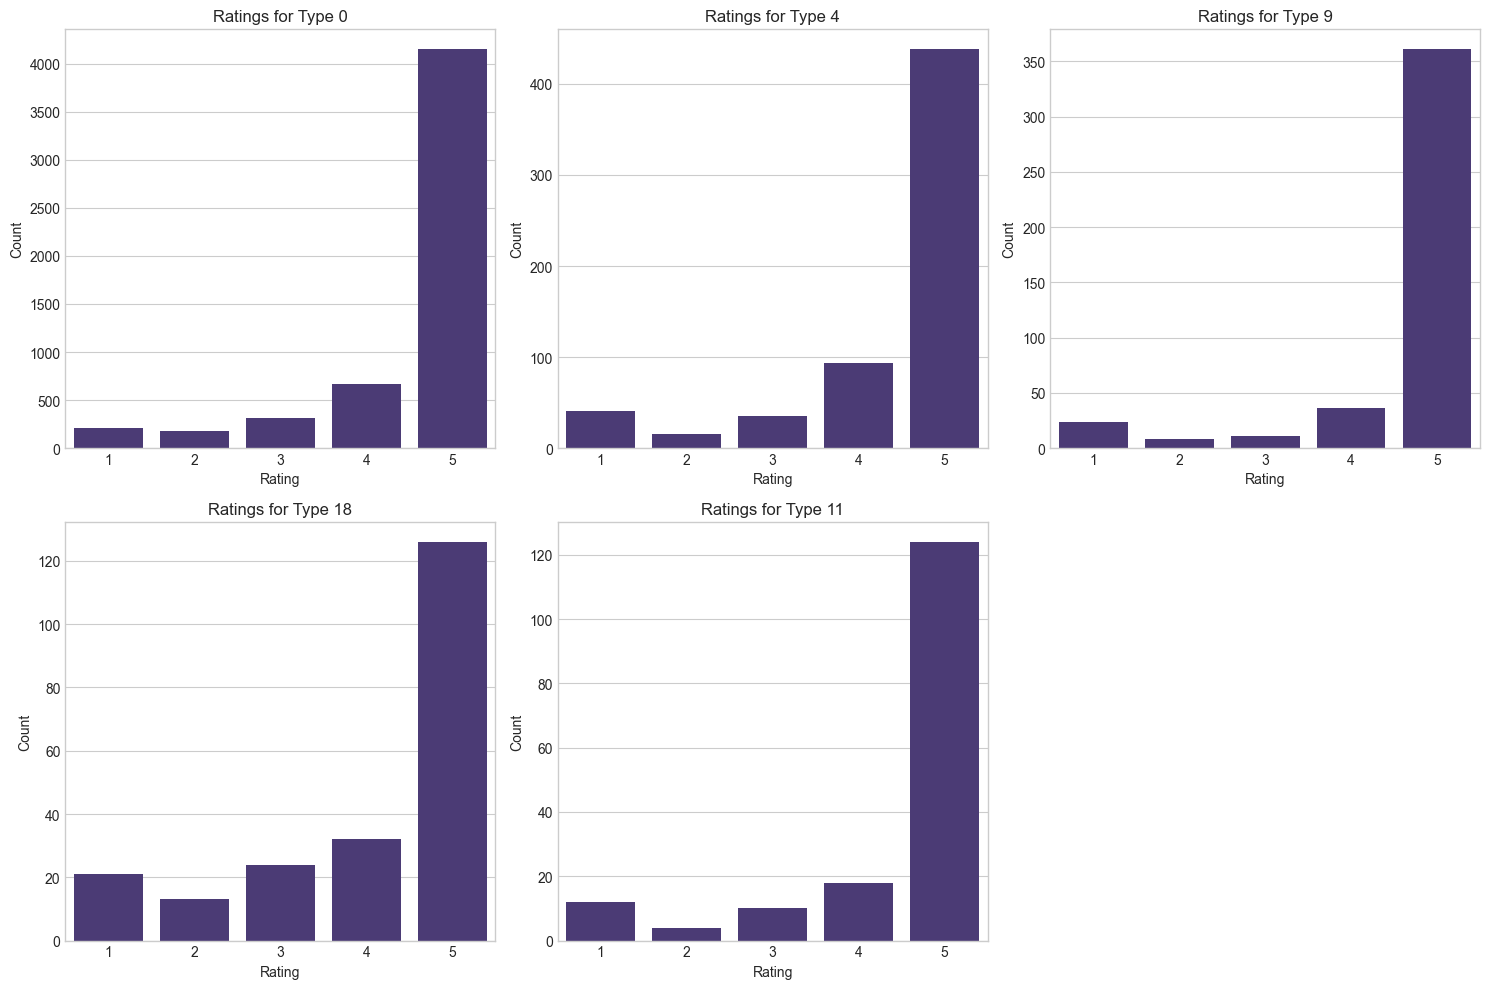

In [196]:
# Analyze the 'type' column
type_counts = df['type'].value_counts()
print("Distribution of types:")
print(type_counts.head(10))

# Visualize types distribution
plt.figure(figsize=(14, 6))
sns.countplot(y='type', data=df, order=df['type'].value_counts().head(15).index)
plt.title('Top 15 Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.tight_layout()
plt.show()

# Analyze rating distribution by most common types
top_types = df['type'].value_counts().head(5).index
plt.figure(figsize=(15, 10))
for i, t in enumerate(top_types):
    plt.subplot(2, 3, i+1)
    type_data = df[df['type'] == t]
    sns.countplot(x='title', data=type_data)
    plt.title(f'Ratings for Type {t}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 16. Save Cleaned Dataset

In [197]:
# Save the cleaned data
df.to_csv('../Cleaned_Data/cleaned_data.csv', index=False)
df.to_excel('../Cleaned_Data/cleaned_data.xlsx', index=False) 

print(f"Cleaned data saved with {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"Data types: {df.dtypes.to_dict()}")

Cleaned data saved with 7973 rows and 3 columns.
Data types: {'title': CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False, categories_dtype=int64), 'content': dtype('O'), 'type': CategoricalDtype(categories=['0', '1', '10', '11', '12', '13', '14', '15', '16', '17',
                  '18', '19', '2', '20', '21', '22', '23', '24', '25', '3',
                  '4', '5', '6', '7', '8', '9'],
, ordered=False, categories_dtype=object)}


## 17. Summary of Data Cleaning Process

1. **Initial dataset**: Loaded raw data
2. **Missing values**: Removed rows with missing values
3. **Duplicates**: Removed duplicate rows
4. **Rating standardization**: Filtered to keep only valid rating categories and converted to numerical values
5. **Text cleaning**: 
   - Removed extra whitespace, newlines, and carriage returns
   - Removed emojis and normalized repeating characters
   - Removed single-word and empty content entries
6. **Final dataset**: Saved clean dataset for further analysis

The cleaned dataset is now ready for sentiment analysis, topic modeling, or other NLP tasks.